In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv("/kaggle/input/ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv")
df.head()

In [ ]:
# Sort by match(id), then by over and finally by ball
df = df.sort_values(["id","inning", "over", "ball"], ascending=True)
df[:10]

In [ ]:
# Create masks for batsman, runs, sizes, and fours
batsman = df["batsman"].str.contains("MS Dhoni")
batsmen_total_runs = df[batsman]["batsman_runs"].sum()

sixes = df.loc[(batsman) & (df["batsman_runs"] == 6)]
batsmen_total_sixes = sixes["batsman_runs"].count()

fours = df.loc[(batsman) & (df["batsman_runs"] == 4)]
batsmen_total_fours = fours["batsman_runs"].count()

print("MS Dhoni\nRuns: " + str(batsmen_total_runs))
print("Fours : " + str(batsmen_total_fours))
print("Sixes : " + str(batsmen_total_sixes))

**Just to confirm I took a screen shot from the offical IPL website**
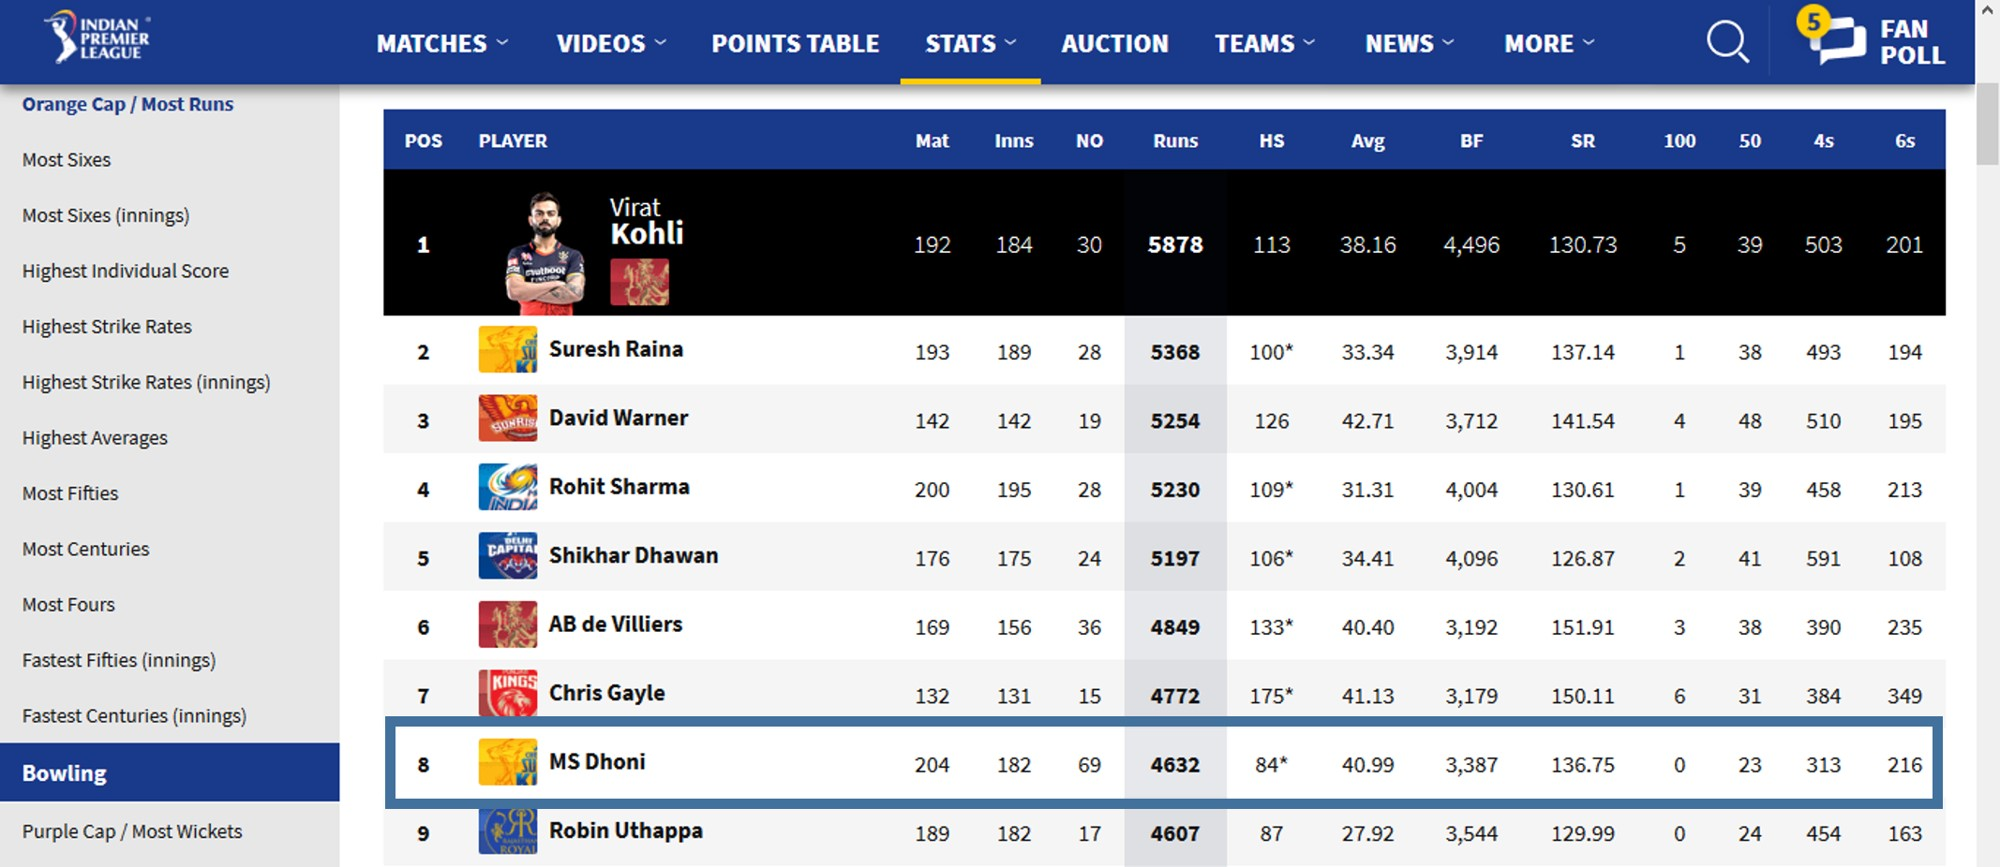

In [ ]:
# Create masks for bowler, wickets, runs
bowler = df["bowler"].str.contains("Narine")
dismissal = df["dismissal_kind"].str.contains("caught|lbw|bowled|stumped")
bowler_total_wickets = df[bowler & dismissal]["dismissal_kind"].count()


# Total runs scored by bastmen for bowler including extras
runs = df.loc[(bowler)]
runs_conceded = runs["total_runs"].sum()

# Total extras conceded that are not added to runs conceded
extras = df["extras_type"].isin(["byes", "legbyes", "penalty"])
extras_conceded = df[bowler & extras]["extra_runs"].sum()

# Total runs coneced
bowler_total_runs_conceded = runs_conceded - extras_conceded
print("Sunil Narine\nWickets : " + str(bowler_total_wickets))
print("Runs conceded : " + str(bowler_total_runs_conceded))


**Let us confirm again from the offical IPL website**
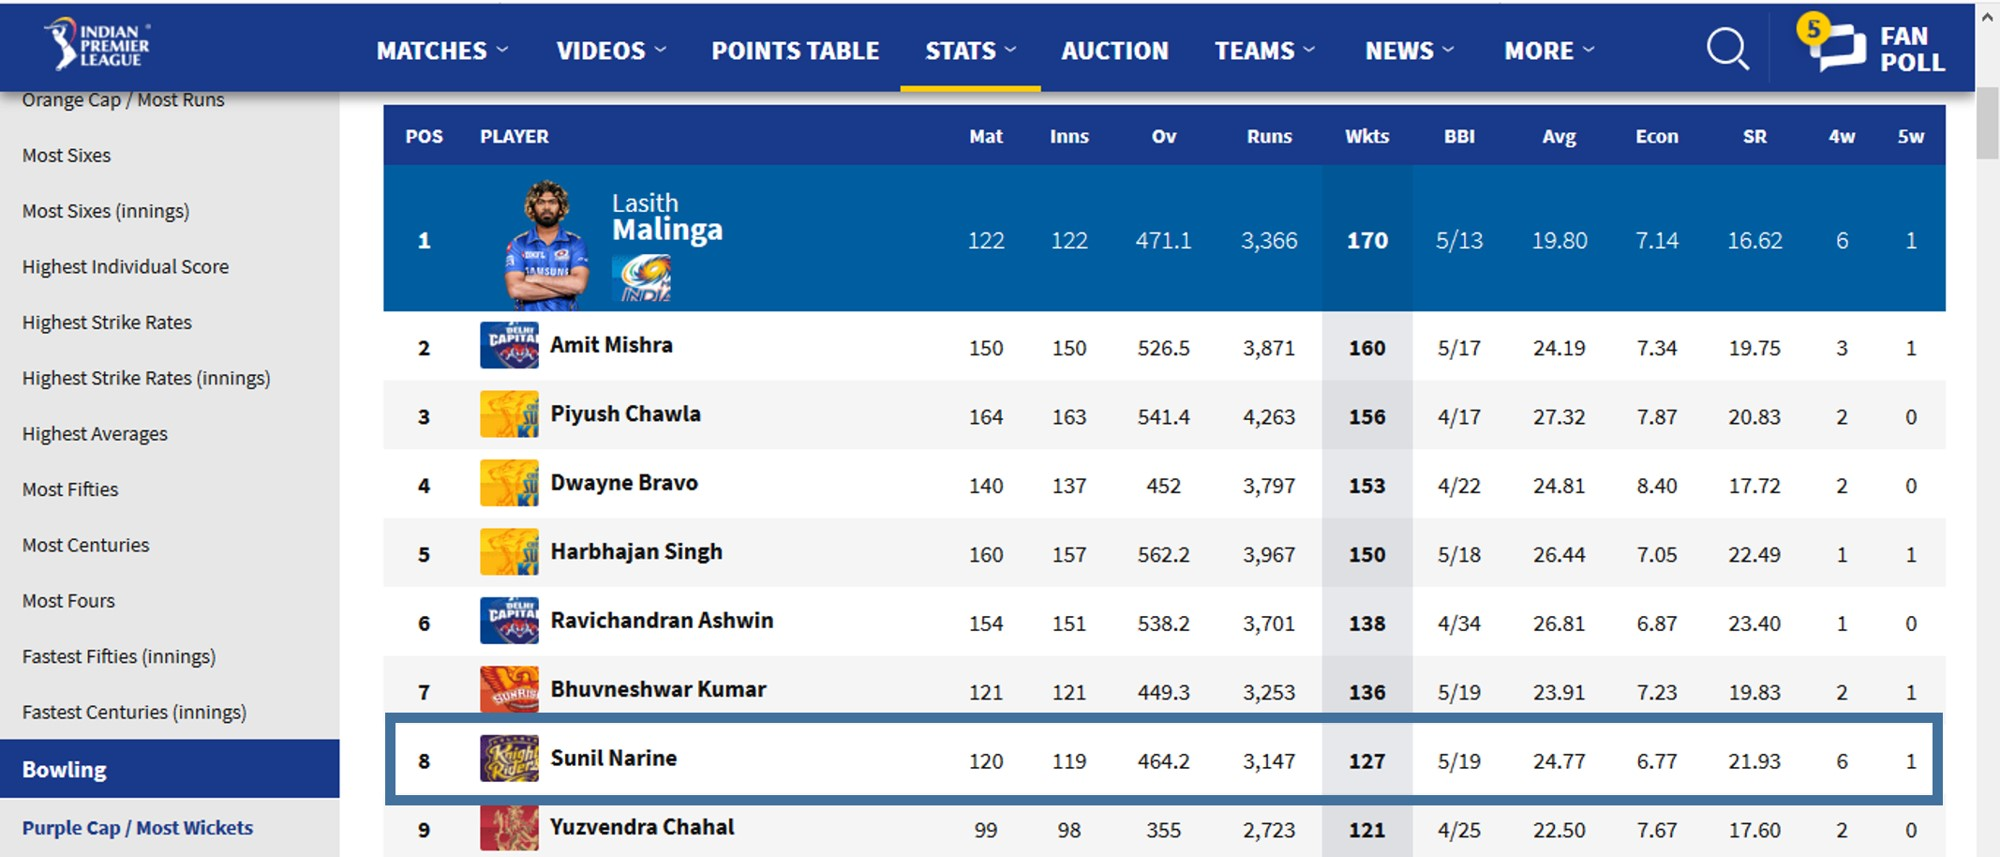